In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
dataset=pd.read_csv('telecom_users.csv')

In [3]:
dataset.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [4]:
dataset.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.468760,64.802213
std,2035.705666,0.367909,24.516391,30.114702
min,0.000000,0.000000,0.000000,18.250000
25%,1777.250000,0.000000,9.000000,35.650000
50%,3546.500000,0.000000,29.000000,70.400000
75%,5291.750000,0.000000,56.000000,89.900000
max,7042.000000,1.000000,72.000000,118.750000


(array([1441.,    0.,    0.,    0.,    0., 3269.,    0.,    0.,    0.,
        1276.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

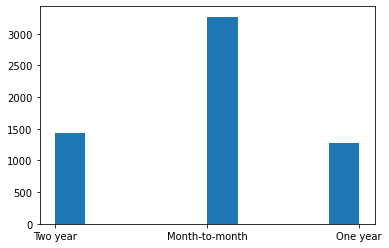

In [5]:
plt.hist(dataset.Contract)

In [6]:
dataset['TotalCharges']=pd.to_numeric(dataset['TotalCharges'], errors='coerce')

In [7]:
dataset.isna().sum()

Unnamed: 0           0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [8]:
dataset['TotalCharges'] = dataset['TotalCharges'].fillna(dataset['TotalCharges'].mean())

In [9]:
dataset.tail()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes
5985,860,4795-UXVCJ,Male,0,No,No,26,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.30,No


In [10]:
dataset['gender']=pd.get_dummies(dataset['gender'])
dataset['Partner']=pd.get_dummies(dataset['Partner'])
dataset['Dependents']=pd.get_dummies(dataset['Dependents'])
dataset['PhoneService']=pd.get_dummies(dataset['PhoneService'])
dataset['MultipleLines']=pd.get_dummies(dataset['MultipleLines'])
dataset['InternetService']=pd.get_dummies(dataset['InternetService'])
dataset['OnlineSecurity']=pd.get_dummies(dataset['OnlineSecurity'])
dataset['OnlineBackup']=pd.get_dummies(dataset['OnlineBackup'])
dataset['DeviceProtection']=pd.get_dummies(dataset['DeviceProtection'])
dataset['TechSupport']=pd.get_dummies(dataset['TechSupport'])
dataset['StreamingTV']=pd.get_dummies(dataset['StreamingTV'])
dataset['StreamingMovies']=pd.get_dummies(dataset['StreamingMovies'])
dataset['PaperlessBilling']=pd.get_dummies(dataset['PaperlessBilling'])
dataset['PaymentMethod']=pd.get_dummies(dataset['PaymentMethod'])
dataset['Churn']=pd.get_dummies(dataset['Churn'])
dataset['Contract']=pd.get_dummies(dataset['Contract'])

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   uint8  
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   uint8  
 5   Dependents        5986 non-null   uint8  
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   uint8  
 8   MultipleLines     5986 non-null   uint8  
 9   InternetService   5986 non-null   uint8  
 10  OnlineSecurity    5986 non-null   uint8  
 11  OnlineBackup      5986 non-null   uint8  
 12  DeviceProtection  5986 non-null   uint8  
 13  TechSupport       5986 non-null   uint8  
 14  StreamingTV       5986 non-null   uint8  
 15  StreamingMovies   5986 non-null   uint8  
 16  Contract          5986 non-null   uint8  


In [12]:
X=dataset.values[:,2:21]
y=dataset.values[:,21]

In [13]:
X=X.astype('int')
X

array([[   0,    0,    0, ...,    0,   24, 1734],
       [   1,    0,    1, ...,    0,   88, 3973],
       [   1,    1,    0, ...,    1,   74, 2869],
       ...,
       [   0,    0,    0, ...,    0,   21,  306],
       [   0,    1,    1, ...,    0,   99, 1200],
       [   0,    0,    1, ...,    0,   19,  457]])

In [14]:
y=y.astype('int')
y

array([1, 1, 0, ..., 1, 0, 1])

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [16]:
X_train

array([[   1,    0,    1, ...,    0,   74,  233],
       [   0,    0,    1, ...,    1,  106, 7348],
       [   0,    0,    1, ...,    0,   93,   93],
       ...,
       [   1,    1,    1, ...,    0,   90,  816],
       [   1,    1,    0, ...,    0,   91, 3301],
       [   1,    0,    1, ...,    0,   58, 1045]])

In [17]:
dtree=DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=10,max_depth=6,random_state=100)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=10,
                       random_state=100)

In [18]:
ypred=dtree.predict(X_test)

In [19]:
ypred

array([1, 1, 0, ..., 1, 1, 1])

In [20]:
accuracy_score(y_test,ypred)

0.7754590984974958

# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rdf=RandomForestClassifier(random_state=0)
rdf.fit(X_train,y_train)
pred_val=rdf.predict(X_test)

In [25]:
accuracy_score(y_test,pred_val)

0.7946577629382304